In [2]:
# Data Download
from tensorflow.keras.datasets import fashion_mnist

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
print(x_train[0].shape)

(28, 28)


In [9]:
# 이미지 필터 정의
import numpy as np
import cv2

# 가로선 추출을 위한 필터
horizontal_filter = np.array([[1.,2.,1.],
                            [0.,0.,0.],
                            [-1.,-2.,-1.]])

# 세로선 추출을 위한 필터
vertical_filter = np.array([[1.,0.,-1.],
                          [2.,0.,-2.],
                          [1.,0.,-1.]])
# 계산의 편의를 위해 이미지의 크기를 (28,28) -> (27,27)로 줄인다. 
test_image = cv2.resize(x_train[0],(27,27))
image_size = test_image.shape[0]
output_size = int((image_size - 3)/1 + 1)
print('output size : {}'.format(output_size))

output size : 25


In [10]:
# 이미지 필터 함수 선언
filter_size = 3

def get_filtered_image(filter):
    filtered_image = np.zeros((output_size,output_size))
    for i in range(output_size):
        for j in range(output_size):
            # 컨볼루션 연산
            indice_image = test_image[i:(i+filter_size),
                                     j:(j+filter_size)] * filter # filter 값을 곱한다
            indice_sum = np.sum(indice_image)
            if(indice_sum>255):
                indice_sum=255
            filtered_image[i,j] = indice_sum
    return filtered_image

<function matplotlib.pyplot.show(*args, **kw)>

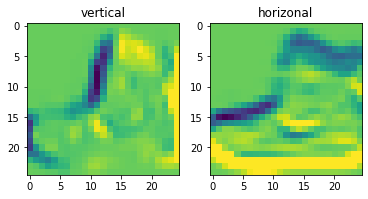

In [16]:
# 이미지 필터 적용
vertical_filtered_image = get_filtered_image(vertical_filter)
horizontal_fitered_image = get_filtered_image(horizontal_filter)

#적용된 필터 그리기 
plt.subplot(1,2,1)
plt.title("vertical")
plt.imshow(vertical_filtered_image)

plt.subplot(1,2,2)
plt.title("horizonal")
plt.imshow(horizontal_fitered_image)

plt.show

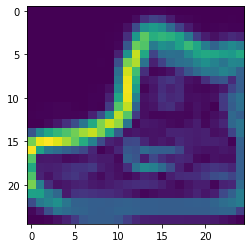

In [17]:
#이미지 필터 적용한 최종 결과
sobel_image = np.sqrt(np.square(horizontal_fitered_image)+np.square(vertical_filtered_image))

plt.imshow(sobel_image)